In [1]:
# This code just analyzes some of the hdf5 stuff and lets you poke around a bit
# Original is explain_this_file.py but decided notebooks are probably better
import h5py
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# TRY keep consistent path relations. Just put them in 4022S_data
# Relative path starts with "../4022S_data/undergrad_testset/" followed by filename
f = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5')

In [2]:
# Experimentations about starting information of the file.

print(list(f.keys()))   #h5py.File works like a python dictionary
                        #we can check the keys

sensor_dataset = f['Sensors']

# calling "sensor_dataset.shape" in terminal bounces an error because it is a group 
# in the hierarchy, not an actual dataset

print(sensor_dataset.name) # is the name of whats in sensor_dataset

['Comments', 'Sensors']
/Sensors


In [3]:
print("This is everything in here\n_______________________________________________")
def printname(name):
    print(name)
#f.visit(printname) # This will print all of the hierarcies and files in the file

display_all = input("Do you want to skip the blurb [y/N]?\n")

if display_all == "n" or display_all == "N":
    f.visit(printname)

# until this point, everything is from https://docs.h5py.org/en/stable/quick.html#quick
# looking now at https://docs.h5py.org/en/stable/high/group.html#group

This is everything in here
_______________________________________________
Comments
Comments/experiment_setup
Comments/sensor_list
Sensors
Sensors/Realsense_Colour
Sensors/Realsense_Colour/Data
Sensors/Realsense_Colour/Data/Image_0
Sensors/Realsense_Colour/Data/Image_0/Timestamps
Sensors/Realsense_Colour/Data/Image_0/Timestamps/nano_seconds
Sensors/Realsense_Colour/Data/Image_0/Timestamps/seconds
Sensors/Realsense_Colour/Data/Image_0/image_data
Sensors/Realsense_Colour/Data/Image_1
Sensors/Realsense_Colour/Data/Image_1/Timestamps
Sensors/Realsense_Colour/Data/Image_1/Timestamps/nano_seconds
Sensors/Realsense_Colour/Data/Image_1/Timestamps/seconds
Sensors/Realsense_Colour/Data/Image_1/image_data
Sensors/Realsense_Colour/Data/Image_10
Sensors/Realsense_Colour/Data/Image_10/Timestamps
Sensors/Realsense_Colour/Data/Image_10/Timestamps/nano_seconds
Sensors/Realsense_Colour/Data/Image_10/Timestamps/seconds
Sensors/Realsense_Colour/Data/Image_10/image_data
Sensors/Realsense_Colour/Data/Image_

In [10]:
# Messing with measurement parameters
#print(f['Comments/experiment_setup'][()])

freq_slope_const = f['Sensors/TI_Radar/Parameters/profileCfg/freqSlopeConst'][()]
chirp_start_index = f['Sensors/TI_Radar/Parameters/frameCfg/chirpStartIndex'][()]
chirp_end_index = f['Sensors/TI_Radar/Parameters/frameCfg/chirpEndIndex'][()]
frame_period = f['Sensors/TI_Radar/Parameters/frameCfg/framePeriod'][()]
ramp_end_time = f['Sensors/TI_Radar/Parameters/profileCfg/rampEndTime'][()]
start_freq = f['Sensors/TI_Radar/Parameters/profileCfg/startFreq'][()]
number_of_samples_per_chirp = f['Sensors/TI_Radar/Parameters/profileCfg/numAdcSamples'][()]
sample_rate = f['']

# Want to calculate Tsweep
# freq_slope / (chirp_end_index - chirp_start_index)
print(f'Tsweep = {freq_slope_const/(chirp_end_index - chirp_start_index)}')

print(f'Num samples = {number_of_samples_per_chirp}')

# Tsweep is rampEndTime according to Talon
print(f'Tsweep = {ramp_end_time}')



Tsweep = 32.905
Num samples = 64
Tsweep = 18.1


In [5]:
target_frame = 'Sensors/TI_Radar/Data/Frame_100'

frame_data = f[f'{target_frame}/frame_data']
time_data = f[f'{target_frame}/Timestamps/nano_seconds']
# Sensors/TI_Radar/Data/Frame_99/Timestamps/nano_seconds
# Sensors/TI_Radar/Data/Frame_99/Timestamps/seconds

# samples x chirps x channels <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
print(frame_data.dtype)
samples = frame_data[:,0,0]
print(samples)

# Print the actual timestamp values
print(time_data[()])


complex64
[ 154.+210.j  194. +35.j  391.-109.j  385. -54.j  -59.-285.j  -19.-258.j
   78. +21.j  -35.+307.j  164.-136.j  433. -25.j  237.-178.j   22.-337.j
  -65.-121.j    9. +38.j  -62.-121.j  316.+129.j  312. -89.j  119.-129.j
   36.-330.j   28.-260.j -127. +29.j   11. -15.j  238. -30.j  137. -13.j
  215.-349.j   53.-235.j  -51.-152.j  -77.-187.j   24.  +0.j   -9. +57.j
  213.-192.j  203.-112.j    3.-263.j -148.-310.j   13.-126.j -117. -49.j
  -17. +28.j  183.-101.j   93.-194.j   37.-209.j  -35.-331.j -188. -87.j
 -225.-113.j    1. -44.j -306.+335.j -229.+297.j -457. -51.j -284.+144.j
 -407.+300.j -536.+149.j  -89.+325.j   66.+368.j -177.+138.j  -58. -95.j
 -235. +31.j -379.+173.j -196.+238.j  -35.+421.j  -74.+328.j   30. -56.j
  108. -18.j -331.+200.j -290. +10.j -178.+287.j]
978281687


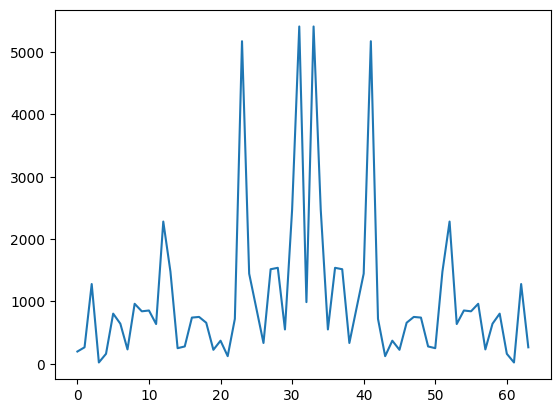

In [6]:
frequency_range = np.fft.fftshift(np.abs(fft(np.real(samples))))
plt.figure()
plt.plot(frequency_range)

In [7]:
#f.close()